In [79]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


## Data preparation

In [80]:
# df_gdp = pd.read_csv("../gdp_analysis/results/gdp_weighted_pop_fifty.csv")
df_gdp = pd.read_csv("../gdp_analysis/results/gdp_weighted_pop_decade.csv")
df_gdp = df_gdp.rename(columns={"region": "region_name"})

#df_cultura = pd.read_csv("../unseen_species_model/results/occupation/raw_results.csv", index_col = [0])
#df_cultura = pd.read_csv("../unseen_species_model/results_50/raw_results.csv", index_col = [0])

# Load Unseen-species data
path = 'unseen_species_model/unseen_species_model.csv'
df_cultura = pd.read_csv(path, index_col = [0])
df_cultura = df_cultura.rename(columns = {'f0_min':'min_f0', 'f0_max':'max_f0'})


df_cultura['N_est'] = df_cultura['f0'] + df_cultura['f1'] + df_cultura['f2']# plus the individual
df_cultura = df_cultura.groupby(['region_name', 'decade']).agg({'N_est': 'sum', 'individual_wikidata_id':'count'}).reset_index()
df_cultura = df_cultura.rename(columns={"individual_wikidata_id": "score"})
df_cultura['survival_ratio'] = df_cultura['score']/df_cultura['N_est']

df = pd.merge(df_gdp, df_cultura, on = ['region_name', 'decade'])
df = df.rename(columns = {'decade': 'year', 'gdp_pc_weighted':'gdp_per_capita'})
df['score_cap'] = df['score']/df['pop']
df['N_est_cap'] = df['N_est']/df['pop']


list(set(df.region_name))
df.region_name.value_counts()

keep = ['Indian world',
 'Nordic countries',
 'Persian world',
 'Portugal',
 'United Kingdom',
 'France',
 'Greek World',
 'Arabic world',
 'Chinese world',
 'Japan',
 'German world',
 'Low countries',
 'Italy',
 'Korea',
 'Spain']

# Apply normalization

df["century"] = df["year"].round(-2)
df["score_log"] = np.log(df["score"])
df["score_cap_log"] = np.log(df["score_cap"])

df["N_est_log"] = np.log(df["N_est"])
df["N_est_cap_log"] = np.log(df["N_est_cap"])
df["score_log_std"] = df["score_log"] / df["score_log"].mean()
df["score_cap_log_std"] = np.log(df["score_cap"]) / df["score_cap_log"].mean()

df["N_est_std"] = df["N_est"] / df["N_est"].mean()
df["N_est_log_std"] = df["N_est_log"] / df["N_est_log"].mean()

df["N_est_cap_log_std"] = np.log(df["N_est_cap"]) / df["N_est_cap_log"].mean()
df["log_gdp"] = np.log(df["gdp_per_capita"])

df["log_gdp_std"] = df["log_gdp"] / df["log_gdp"].mean()
df["gdp_std"] = df["gdp_per_capita"] / df["gdp_per_capita"].mean()
df["survival_ratio_std"] = df["survival_ratio"] / df["survival_ratio"].mean()

df.sample(10)

region_name  year  gdp_per_capita           pop        N_est  score  \
278     Low countries  1670     3336.205189   1780.000000  1221.069444    173   
261     Low countries  1500     2344.572603    992.750000   431.246426     23   
400             Spain  1450     1380.481828   6520.000000    92.325089     10   
202       Greek World  1860     2525.792826  19632.235417  1132.601178     42   
402             Spain  1470     1063.324039   6632.000000    80.900987      7   
351          Portugal  1560     1376.130548   1060.000000   533.485140     18   
283     Low countries  1720     3569.761789   1972.166667  1517.102544    125   
104            France  1780     1874.558760  27990.333333  9219.839868    626   
243             Japan  1820     1317.000000  31000.000000   286.772940     33   
309  Nordic countries  1520     1946.363636    592.000000    60.799794      5   

     survival_ratio  score_cap  N_est_cap  century  ...  N_est_cap_log  \
278        0.141679   0.097191   0.685994     1700  ...      -0.376886   
261        0.053334   0.023168   0.434396     1500  ...      -0.833799   
400        0.108313   0.001534   0.014160     1400  ...      -4.257314   
202        0.037083   0.002139   0.057691     1900  ...      -2.852656   
402        0.086526   0.001055   0.012199     1500  ...      -4.406436   
351        0.033740   0.016981   0.503288     1600  ...      -0.686593   
283        0.082394   0.063382   0.769257     1700  ...      -0.262330   
104        0.067897   0.022365   0.329394     1800  ...      -1.110502   
243        0.115074   0.001065   0.009251     1800  ...      -4.683052   
309        0.082237   0.008446   0.102702     1500  ...      -2.275920   

     score_log_std  score_cap_log_std  N_est_std  N_est_log_std  \
278       1.483149           0.414496   0.325185       1.149200   
261       0.902415           0.669463   0.114846       0.980914   
400       0.662698           1.152236   0.024587       0.731693   
202       1.075724           1.093062   0.301625       1.137040   
402       0.560045           1.218686   0.021545       0.710335   
351       0.831867           0.724704   0.142073       1.015314   
283       1.389618           0.490510   0.404022       1.184299   
104       1.853285           0.675736   2.455348       1.476075   
243       1.006316           1.217171   0.076371       0.914947   
309       0.463206           0.848891   0.016192       0.664151   

     N_est_cap_log_std   log_gdp  log_gdp_std   gdp_std  survival_ratio_std  
278           0.129349  8.112589     1.094258  1.870298            1.788015  
261           0.286162  7.759858     1.046680  1.314382            0.673082  
400           1.461123  7.230188     0.975236  0.773907            1.366928  
202           0.979040  7.834310     1.056722  1.415976            0.467991  
402           1.512302  6.969155     0.940027  0.596106            1.091967  
351           0.235641  7.227031     0.974810  0.771468            0.425810  
283           0.090033  8.180254     1.103384  2.001231            1.039826  
104           0.381127  7.536129     1.016502  1.050890            0.856873  
243           1.607238  7.183112     0.968886  0.738319            1.452250  
309           0.781103  7.573718     1.021572  1.091144            1.037847  

[10 rows x 23 columns]

## Corrected CPI

In [81]:
tables_dict = {}

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: log_gdp_std
No. Observations: 508     Method:             REML       
No. Groups:       15      Scale:              0.0006     
Min. group size:  2       Log-Likelihood:     1122.0764  
Max. group size:  64      Converged:          Yes        
Mean group size:  33.9                                   
---------------------------------------------------------
                Coef. Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       0.924    0.011 87.368 0.000  0.903  0.945
N_est_log_std   0.063    0.004 15.679 0.000  0.055  0.071
Group Var       0.001    0.023                           

                            OLS Regression Results                            
Dep. Variable:            log_gdp_std   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.247
Method:           

/Users/charlesdedampierre/Desktop/cultura_project/.venv/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


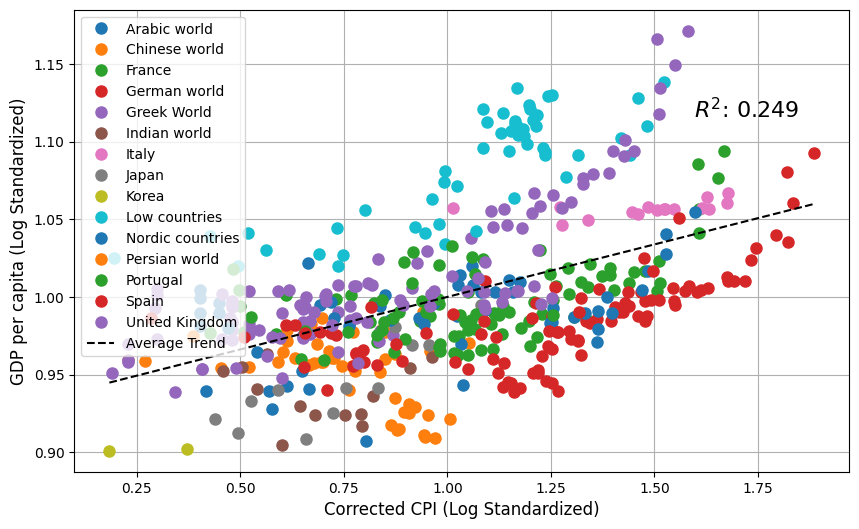

In [97]:
df_ols = df[['region_name', 'year', 'log_gdp_std', 'N_est_log_std', 'score_log_std']].copy()


# Mixed Effects Model
model = smf.mixedlm("log_gdp_std ~ N_est_log_std", df_ols, groups=df_ols["region_name"])
result = model.fit()


sm_table = result.summary().tables[1]
sm_table.index = ['Intercept', 'alpha', 'Group Var']
sm_table['model'] = 'Corrected CPI'
sm_table = sm_table.reset_index()
tables_dict['Corrected CPI'] = sm_table


# Output model summary to get R-square values if available (typically for OLS, not directly for MixedLM)
print(result.summary())

# Fitting an OLS model to obtain a single average trend line across all data
average_ols_model = smf.ols("log_gdp_std ~ N_est_log_std", data=df_ols).fit()
#average_ols_model = smf.mixedlm("log_gdp_std ~ N_est_log_std", df_ols, groups=df_ols["region_name"]).fit()
print(average_ols_model.summary())

# Prepare plot for relationship with a single average trend line
plt.figure(figsize=(10, 6))
for name, group in df_ols.groupby('region_name'):
    plt.plot(group['N_est_log_std'], group['log_gdp_std'], marker='o', linestyle='', ms=8, label=name)

# Calculate the average trend line across all data
x_vals = np.linspace(df_ols['N_est_log_std'].min(), df_ols['N_est_log_std'].max(), 100)
y_vals = average_ols_model.params['Intercept'] + average_ols_model.params['N_est_log_std'] * x_vals
plt.plot(x_vals, y_vals, 'k--', label='Average Trend')

plt.legend()
plt.xlabel('Corrected CPI (Log Standardized)', fontsize=12)
plt.ylabel('GDP per capita (Log Standardized)', fontsize=12)
plt.title('')
plt.grid(True)

# Show R-squared on the plot for the average trend line
r_squared = average_ols_model.rsquared
plt.figtext(0.85, 0.7, f'$R^2$: {r_squared:.3f}', ha='right', fontsize=16)

plt.show()

## CPI

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: log_gdp_std
No. Observations: 508     Method:             REML       
No. Groups:       15      Scale:              0.0006     
Min. group size:  2       Log-Likelihood:     1133.6264  
Max. group size:  64      Converged:          Yes        
Mean group size:  33.9                                   
---------------------------------------------------------
                Coef. Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       0.944    0.010 90.286 0.000  0.924  0.965
score_log_std   0.042    0.003 16.810 0.000  0.037  0.047
Group Var       0.002    0.025                           



/Users/charlesdedampierre/Desktop/cultura_project/.venv/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


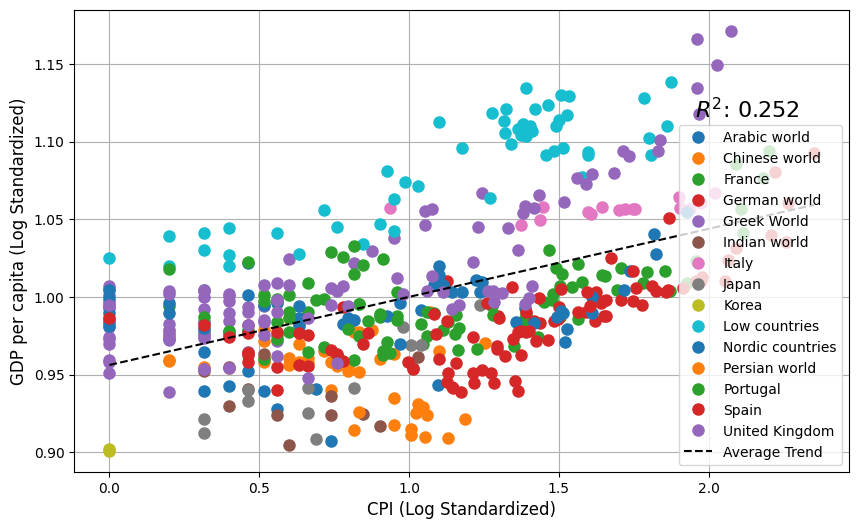

In [98]:
# Mixed Effects Model
model = smf.mixedlm("log_gdp_std ~ score_log_std", df_ols, groups=df_ols["region_name"])
result = model.fit()


sm_table = result.summary().tables[1]
sm_table.index = ['Intercept', 'alpha', 'Group Var']
sm_table['model'] = 'CPI'
sm_table = sm_table.reset_index()
tables_dict['CPI'] = sm_table

# Output model summary to get R-square values if available (typically for OLS, not directly for MixedLM)
print(result.summary())

# Fitting an OLS model to obtain a single average trend line across all data
average_ols_model = smf.ols("log_gdp_std ~ score_log_std", data=df_ols).fit()

# Prepare plot for relationship with a single average trend line
plt.figure(figsize=(10, 6))
for name, group in df_ols.groupby('region_name'):
    plt.plot(group['score_log_std'], group['log_gdp_std'], marker='o', linestyle='', ms=8, label=name)

# Calculate the average trend line across all data
x_vals = np.linspace(df_ols['score_log_std'].min(), df_ols['score_log_std'].max(), 100)
y_vals = average_ols_model.params['Intercept'] + average_ols_model.params['score_log_std'] * x_vals
plt.plot(x_vals, y_vals, 'k--', label='Average Trend')

plt.legend()
plt.xlabel('CPI (Log Standardized)', fontsize=12)
plt.ylabel('GDP per capita (Log Standardized)', fontsize=12)
plt.title('')
plt.grid(True)

# Show R-squared on the plot for the average trend line
r_squared = average_ols_model.rsquared
plt.figtext(0.85, 0.7, f'$R^2$: {r_squared:.3f}', ha='right', fontsize=16)

plt.show()

## Corrected CPI 1800-1880

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: log_gdp_std
No. Observations: 107     Method:             REML       
No. Groups:       15      Scale:              0.0003     
Min. group size:  2       Log-Likelihood:     252.9239   
Max. group size:  9       Converged:          Yes        
Mean group size:  7.1                                    
---------------------------------------------------------
                Coef. Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       0.814    0.022 37.277 0.000  0.771  0.856
N_est_log_std   0.159    0.016 10.048 0.000  0.128  0.190
Group Var       0.002    0.049                           

                            OLS Regression Results                            
Dep. Variable:            log_gdp_std   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.515
Method:           

/Users/charlesdedampierre/Desktop/cultura_project/.venv/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


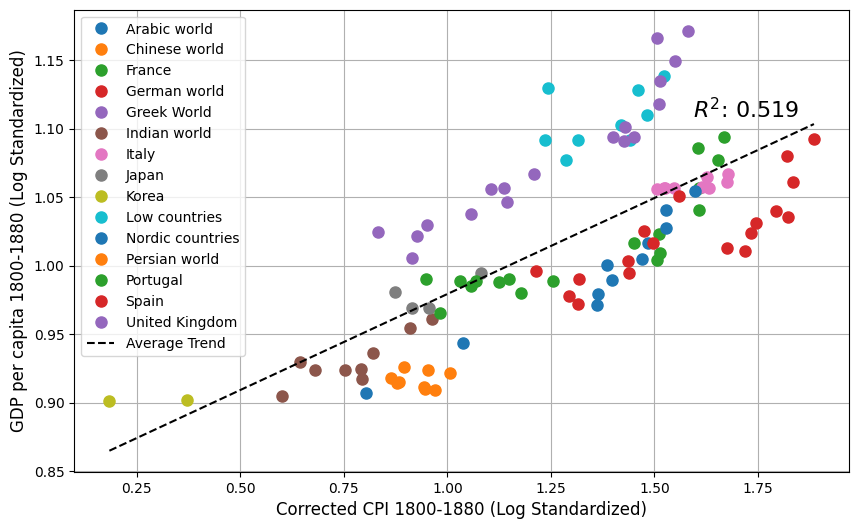

In [95]:
df_ols = df[['region_name', 'year', 'log_gdp_std', 'N_est_log_std', 'score_log_std']].copy()
df_ols = df_ols[df_ols['year']>=1800]
df_ols.region_name.value_counts()

# Mixed Effects Model
model = smf.mixedlm("log_gdp_std ~ N_est_log_std", df_ols, groups=df_ols["region_name"])
result = model.fit()

# Output model summary to get R-square values if available (typically for OLS, not directly for MixedLM)
print(result.summary())

sm_table = result.summary().tables[1]
sm_table.index = ['Intercept', 'alpha', 'Group Var']
sm_table['model'] = 'Corrected CPI 1800-1880'
sm_table = sm_table.reset_index()
tables_dict['Corrected CPI 1800-1880'] = sm_table


# Fitting an OLS model to obtain a single average trend line across all data
average_ols_model = smf.ols("log_gdp_std ~ N_est_log_std", data=df_ols).fit()
#average_ols_model = smf.mixedlm("log_gdp_std ~ N_est_log_std", df_ols, groups=df_ols["region_name"]).fit()
print(average_ols_model.summary())

# Prepare plot for relationship with a single average trend line
plt.figure(figsize=(10, 6))
for name, group in df_ols.groupby('region_name'):
    plt.plot(group['N_est_log_std'], group['log_gdp_std'], marker='o', linestyle='', ms=8, label=name)

# Calculate the average trend line across all data
x_vals = np.linspace(df_ols['N_est_log_std'].min(), df_ols['N_est_log_std'].max(), 100)
y_vals = average_ols_model.params['Intercept'] + average_ols_model.params['N_est_log_std'] * x_vals
plt.plot(x_vals, y_vals, 'k--', label='Average Trend')

plt.legend()
plt.xlabel('Corrected CPI 1800-1880 (Log Standardized)', fontsize=12)
plt.ylabel('GDP per capita 1800-1880 (Log Standardized)', fontsize=12)
plt.title('')
plt.grid(True)

# Show R-squared on the plot for the average trend line
r_squared = average_ols_model.rsquared


plt.figtext(0.85, 0.7, f'$R^2$: {r_squared:.3f}', ha='right', fontsize=16)

plt.show()



## CPI 1800-1880

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: log_gdp_std
No. Observations: 107     Method:             REML       
No. Groups:       15      Scale:              0.0003     
Min. group size:  2       Log-Likelihood:     250.5761   
Max. group size:  9       Converged:          Yes        
Mean group size:  7.1                                    
---------------------------------------------------------
                Coef. Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       0.877    0.017 52.166 0.000  0.844  0.910
score_log_std   0.094    0.010  9.810 0.000  0.075  0.113
Group Var       0.002    0.045                           

                            OLS Regression Results                            
Dep. Variable:            log_gdp_std   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.524
Method:           

/Users/charlesdedampierre/Desktop/cultura_project/.venv/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


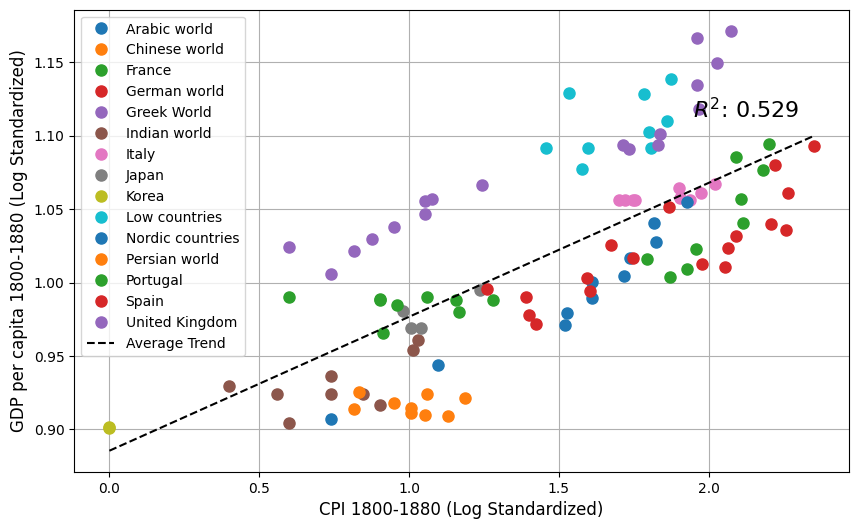

In [96]:
df_ols = df[['region_name', 'year', 'log_gdp_std', 'N_est_log_std', 'score_log_std']].copy()
df_ols = df_ols[df_ols['year']>=1800]
df_ols.region_name.value_counts()

# Mixed Effects Model
model = smf.mixedlm("log_gdp_std ~ score_log_std", df_ols, groups=df_ols["region_name"])
result = model.fit()

# Output model summary to get R-square values if available (typically for OLS, not directly for MixedLM)
print(result.summary())

sm_table = result.summary().tables[1]
sm_table.index = ['Intercept', 'alpha', 'Group Var']
sm_table['model'] = 'CPI 1800-1880'
sm_table = sm_table.reset_index()
tables_dict['CPI 1800-1880'] = sm_table


# Fitting an OLS model to obtain a single average trend line across all data
average_ols_model = smf.ols("log_gdp_std ~ score_log_std", data=df_ols).fit()
#average_ols_model = smf.mixedlm("log_gdp_std ~ N_est_log_std", df_ols, groups=df_ols["region_name"]).fit()
print(average_ols_model.summary())

# Prepare plot for relationship with a single average trend line
plt.figure(figsize=(10, 6))
for name, group in df_ols.groupby('region_name'):
    plt.plot(group['score_log_std'], group['log_gdp_std'], marker='o', linestyle='', ms=8, label=name)

# Calculate the average trend line across all data
x_vals = np.linspace(df_ols['score_log_std'].min(), df_ols['score_log_std'].max(), 100)
y_vals = average_ols_model.params['Intercept'] + average_ols_model.params['score_log_std'] * x_vals
plt.plot(x_vals, y_vals, 'k--', label='Average Trend')

plt.legend()
plt.xlabel('CPI 1800-1880 (Log Standardized)', fontsize=12)
plt.ylabel('GDP per capita 1800-1880 (Log Standardized)', fontsize=12)
plt.title('')
plt.grid(True)

# Show R-squared on the plot for the average trend line
r_squared = average_ols_model.rsquared


plt.figtext(0.85, 0.7, f'$R^2$: {r_squared:.3f}', ha='right', fontsize=16)

plt.show()

#### Stats Table

In [89]:
final_table = pd.concat(tables_dict.values(), ignore_index=True).reset_index(drop=True)
final_table = final_table[final_table['index']=='alpha']
final_table = final_table.drop(['index', 'z'], axis=1)
final_table = final_table.sort_values('Coef.', ascending=True)
final_table = final_table.rename(columns={'[0.025':'0.025', '0.975]':'0.975'})
list(final_table.columns)

final_table['Coef.'] = final_table['Coef.'].astype(float)
final_table['0.025'] = final_table['0.025'].astype(float)
final_table['0.975'] = final_table['0.975'].astype(float)
final_table['P>|z|'] = final_table['P>|z|'].astype(float)
final_table = final_table.reset_index(drop=True)

final_table

Coef. Std.Err.  P>|z|  0.025  0.975                    model
0  0.042    0.003    0.0  0.037  0.047                      CPI
1  0.063    0.004    0.0  0.055  0.071            Corrected CPI
2  0.094    0.010    0.0  0.075  0.113            CPI 1800-1880
3  0.159    0.016    0.0  0.128  0.190  Corrected CPI 1800-1880

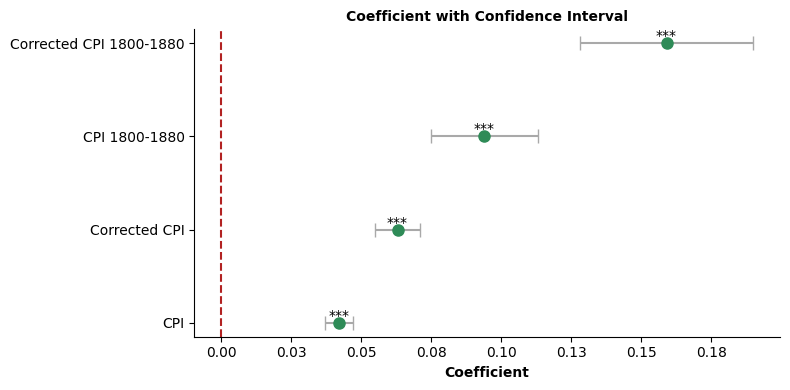

In [99]:
fig, ax = plt.subplots(figsize=(8, 4))  # Increased figure size for more models

# Plot the data points and error bars
ax.errorbar(final_table['Coef.'], final_table['model'], 
            xerr=[final_table['Coef.'] - final_table['0.025'], 
                  final_table['0.975'] - final_table['Coef.']],
            fmt='o', capsize=5, ecolor='darkgray', markersize=8, 
            color='seagreen', linewidth=1.5, zorder=2)

# Add a vertical line at x=0
ax.axvline(x=0, color='firebrick', linestyle='--', linewidth=1.5, zorder=1)

# Add *** on top of the green dots
for i, model in enumerate(final_table['model']):
    ax.text(final_table['Coef.'][i], model, '***', ha='center', va='bottom', color='black', fontsize=10)

# Customize the plot
ax.set_xlabel('Coefficient', fontweight='bold')
ax.set_ylabel('', fontweight='bold')
ax.set_title('Coefficient with Confidence Interval', fontsize=10, fontweight='bold')

# Adjust the x-axis to show more precision
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x:.2f}"))

# Remove top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()